In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-58.16762399378079 22.425945515279494
-66.23352140344267 -67.35583982447841
-4.301781138086369 -169.70210417941405
17.544470075352706 -43.91226859391793
64.68987145720288 -103.32017531235049
-6.860260846871583 -35.778078168438526
-47.2793166061748 -45.62726190088776
7.3705237880527505 -145.0643508300413
50.356985637851636 -20.90050212885592
-87.2920148499618 -100.59059422341218
85.02768625531905 -49.51493093301582
-55.70639771161385 177.39250715627702
58.443636376629115 -57.673886637301266
-49.77426408770762 29.35260016306293
31.112157935263056 -144.52013408662611
-50.97565819183049 113.36354463428114
-43.52726667739143 36.530261847174756
-15.614963692493504 125.11197689062294
-9.601394494697075 -55.481183903785634
3.3443990220893767 -42.18980603055607
7.400826150341956 7.774188481825746
-81.09505735644088 -31.31673300733479
6.9031101982173055 -97.91330292221824
-25.705333437482636 -115.0841979287791
-86.48554627830761 -10.259389068270451
-60.75172043605882 -161.6156981013517
44.004887

-57.42381992465788 -119.82700188301291
20.185383403649553 84.38856667217277
35.11235176450897 -153.29557048960203
-74.15898590810329 -95.83143783332787
-51.798214757160586 -30.320132544356085
53.85365898063441 -111.21555121039282
27.51335759032972 -7.204042352634161
57.16523337266588 -165.65257039276807
-47.37830313536198 48.460585766597234
65.31974387613923 -73.11001359543704
-75.3427289213843 133.6196230107583
-55.060807093508444 62.09949128572114
28.010598446146886 -72.38820088619988
-46.66248173237259 15.319992983654345
-66.63028282704718 -109.92985790296186
32.363628813557014 36.968478820958865
77.51569157516064 -81.85779328168616
-56.59249504169959 99.83352402493068
-39.51752584979178 144.96741201305463
74.7252067439477 -131.2209605166143
89.86495657827851 131.71233893465546
24.2447444886636 -150.00276514628428
20.49700031334787 -114.97146169240882
-67.99918944217097 -80.10339728425888
-10.202780212954139 140.83090597490929
45.11750752031929 -95.02580222213155
19.942186323915465 

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3ad172bff146246b1b1e0b879d946363


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | saleaula
City not found. Skipping...
Processing Record 4 of Set 1 | sinnamary
Processing Record 5 of Set 1 | la ronge
Processing Record 6 of Set 1 | arara
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | dingle
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | upernavik
Processing Record 12 of Set 1 | dunedin
Processing Record 13 of Set 1 | saint-augustin
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | kununurra
Processing Record 18 of Set 1 | alta floresta
Processing Record 19 of Set 1 | cururupu
Processing Record 20 of Set 1 | ankpa
Processing Record 21 of Set 1 | pochutla
Processing Record 22 of Set 1 | rikitea
Processing Record 23 of Set 1 | hermanus
Processing Record 24 

Processing Record 41 of Set 4 | severo-kurilsk
Processing Record 42 of Set 4 | bosaso
Processing Record 43 of Set 4 | provideniya
Processing Record 44 of Set 4 | sao filipe
Processing Record 45 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 46 of Set 4 | amga
Processing Record 47 of Set 4 | luderitz
Processing Record 48 of Set 4 | ilulissat
Processing Record 49 of Set 4 | namanga
Processing Record 50 of Set 4 | vestmanna
Processing Record 1 of Set 5 | grandview
Processing Record 2 of Set 5 | anori
Processing Record 3 of Set 5 | vila velha
Processing Record 4 of Set 5 | roma
Processing Record 5 of Set 5 | wulanhaote
City not found. Skipping...
Processing Record 6 of Set 5 | vaini
Processing Record 7 of Set 5 | pacific grove
Processing Record 8 of Set 5 | quatre cocos
Processing Record 9 of Set 5 | mahibadhoo
Processing Record 10 of Set 5 | miandoab
Processing Record 11 of Set 5 | vinh
Processing Record 12 of Set 5 | yumen
Processing Record 13 of Set 5 | jumla
Proce

Processing Record 34 of Set 8 | longhua
Processing Record 35 of Set 8 | tirschenreuth
Processing Record 36 of Set 8 | rorvik
Processing Record 37 of Set 8 | altay
Processing Record 38 of Set 8 | cockburn harbour
City not found. Skipping...
Processing Record 39 of Set 8 | urulga
City not found. Skipping...
Processing Record 40 of Set 8 | klaksvik
Processing Record 41 of Set 8 | paka
Processing Record 42 of Set 8 | brodick
Processing Record 43 of Set 8 | tuban
Processing Record 44 of Set 8 | eenhana
Processing Record 45 of Set 8 | port lincoln
Processing Record 46 of Set 8 | kpandae
Processing Record 47 of Set 8 | beloha
Processing Record 48 of Set 8 | bastia
Processing Record 49 of Set 8 | plettenberg bay
Processing Record 50 of Set 8 | yahotyn
Processing Record 1 of Set 9 | lakselv
Processing Record 2 of Set 9 | palmas bellas
Processing Record 3 of Set 9 | bur gabo
City not found. Skipping...
Processing Record 4 of Set 9 | tiruchchendur
Processing Record 5 of Set 9 | ahumada
City not f

Processing Record 18 of Set 12 | sorland
Processing Record 19 of Set 12 | formoso do araguaia
City not found. Skipping...
Processing Record 20 of Set 12 | salinopolis
Processing Record 21 of Set 12 | makhachkala
Processing Record 22 of Set 12 | bermejo
Processing Record 23 of Set 12 | betioky
Processing Record 24 of Set 12 | ondjiva
Processing Record 25 of Set 12 | mega
Processing Record 26 of Set 12 | kanker
Processing Record 27 of Set 12 | aktau
Processing Record 28 of Set 12 | long xuyen
Processing Record 29 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 30 of Set 12 | ketchikan
Processing Record 31 of Set 12 | plastun
Processing Record 32 of Set 12 | evensk
Processing Record 33 of Set 12 | araouane
Processing Record 34 of Set 12 | constitucion
Processing Record 35 of Set 12 | russell
Processing Record 36 of Set 12 | storforshei
Processing Record 37 of Set 12 | balikpapan
Processing Record 38 of Set 12 | blytheville
Processing Record 39 of Set 12 | mount gamb

In [12]:
len(city_data)

573

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,50.41,82,15,3.89,ZA,2022-06-19 19:51:34
1,Ushuaia,-54.8000,-68.3000,29.86,100,100,2.30,AR,2022-06-19 19:48:24
2,Sinnamary,5.3833,-52.9500,79.95,81,100,7.09,GF,2022-06-19 19:51:35
3,La Ronge,55.1001,-105.2842,70.05,64,100,3.44,CA,2022-06-19 19:51:35
4,Arara,-6.8283,-35.7583,71.60,88,57,10.02,BR,2022-06-19 19:51:35
5,Mar Del Plata,-38.0023,-57.5575,53.62,68,75,12.66,AR,2022-06-19 19:51:36
6,Hilo,19.7297,-155.0900,84.27,75,100,5.75,US,2022-06-19 19:47:59
7,Dingle,10.9995,122.6711,77.09,87,100,2.75,PH,2022-06-19 19:51:36
8,Punta Arenas,-53.1500,-70.9167,39.31,75,20,23.02,CL,2022-06-19 19:51:36
9,Upernavik,72.7868,-56.1549,34.59,90,28,13.35,GL,2022-06-19 19:51:37


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2022-06-19 19:51:34,-34.5322,20.0403,50.41,82,15,3.89
1,Ushuaia,AR,2022-06-19 19:48:24,-54.8000,-68.3000,29.86,100,100,2.30
2,Sinnamary,GF,2022-06-19 19:51:35,5.3833,-52.9500,79.95,81,100,7.09
3,La Ronge,CA,2022-06-19 19:51:35,55.1001,-105.2842,70.05,64,100,3.44
4,Arara,BR,2022-06-19 19:51:35,-6.8283,-35.7583,71.60,88,57,10.02
...,...,...,...,...,...,...,...,...,...
568,Stephenville,US,2022-06-19 20:06:29,32.2207,-98.2023,98.73,25,40,10.36
569,Gambela,ET,2022-06-19 20:06:30,8.2500,34.5833,70.00,95,100,3.09
570,El Dorado,US,2022-06-19 20:06:30,38.7666,-120.5177,73.80,37,0,1.99
571,Iracoubo,GF,2022-06-19 20:06:30,5.4802,-53.2011,80.19,79,100,7.16


In [16]:
# Create the output file (CSV).
output_data_file = "/Users/lukehg/Desktop/DA_class/week_6/world_weather_analysis/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

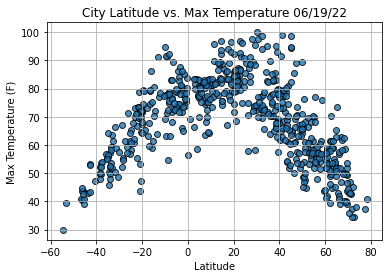

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("/Users/lukehg/Desktop/DA_class/week_6/world_weather_analysis/Fig1.png")

# Show plot.
plt.show()

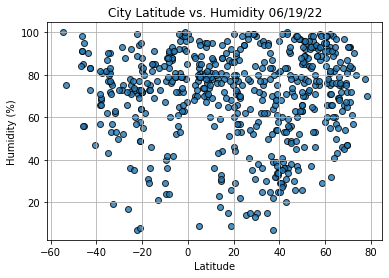

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("/Users/lukehg/Desktop/DA_class/week_6/world_weather_analysis/Fig2.png")
# Show plot.
plt.show()

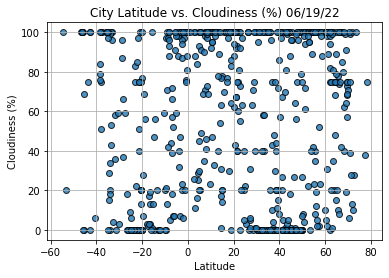

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("/Users/lukehg/Desktop/DA_class/week_6/world_weather_analysis/Fig3.png")
# Show plot.
plt.show()

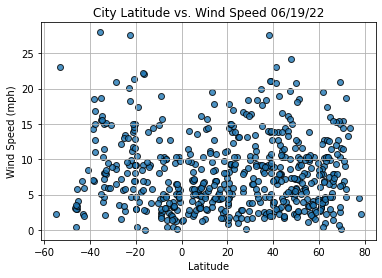

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("/Users/lukehg/Desktop/DA_class/week_6/world_weather_analysis/Fig4.png")
# Show plot.
plt.show()